# USGAP-WVBBA2 Habitat Data Comparison 

## *Eastern Bluebird*
Nathan Tarr and Jessie Jordan

In [4]:
species = 'Eastern Bluebird'

In [5]:
import pandas as pd
import repo_functions as fun
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 15)

# Load land cover crosswalk - slow loading for some reason
cross = pd.read_csv(fun.dataDir + "LandCover/land_cover_crosswalk.csv", header=0, dtype={'GAP_code': str}) 

In [6]:
# Perform crosswalk of detections from WV -> USGAP
master, GAP_linked, unmatched, gap_types, wv_types = fun.cross_to_GAP(species, cross, print_tables=True)


System associations in the GAP model
                                                         GAP_name
GAP_code                                                         
1201                                        Developed, Open Space
1202                                     Developed, Low-intensity
1203                                  Developed, Medium-intensity
1402                                          Cultivated Cropland
1403                                                  Pasture/Hay
3207      North-Central Appalachian Circumneutral Cliff and Talus
3208             North-Central Appalachian Acidic Cliff and Talus
4314                                    Appalachian Shale Barrens
4335                  Central Appalachian Pine-Oak Rocky Woodland
4537        Southern Appalachian Montane Pine Forest and Woodland
5511              Central Appalachian Alkaline Glade and Woodland
5512      Central Interior Highlands Calcareous Glade and Barrens
8103            Disturbed/Successional

## Validated

In [7]:
# Show validated associations ------------------------------------------------
print("Validated associations")
df_valid = master[master['evaluation'] == 'valid']
print(df_valid[['GAP_code', 'GAP_name', 'detections']])

Validated associations
  GAP_code             GAP_name  detections
6     1402  Cultivated Cropland         2.0
7     1403          Pasture/Hay        43.0


## Additions

In [8]:
# Show supported additions ---------------------------------------------------
print("New GAP ecological system associations that are supported by WVBBA:")
df_add = master[master['evaluation'] == 'add_association']
print(df_add[['GAP_code', 'GAP_name', 'detections']])

New GAP ecological system associations that are supported by WVBBA:
   GAP_code                      GAP_name  detections
8      3105  Undifferentiated Barren Land         5.0
36     8504                Ruderal forest        17.0


## Invalid codes

In [9]:
# Show invalid WV codes entered ----------------------------------------------
print("Invalid habitat codes entered by WVBBA observers:")
print(unmatched)

Invalid habitat codes entered by WVBBA observers:
{'32': 7.0}


## Summary

                      detections
Unusable                   289.0
Supported validation        45.0
Supported addition          22.0
Total detections           356.0


Text(0, 0.5, '')

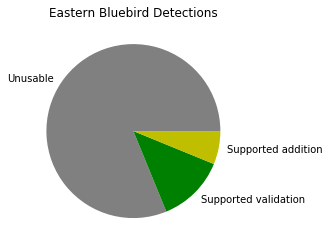

In [10]:
# Report and plot results for usable detections ------------------------------
usable_df = pd.DataFrame(index=["Unusable", "Supported validation", "Supported addition", "Total detections"], 
                         columns=["detections"])
usable_df.loc['Supported validation', 'detections'] = int(df_valid[['detections']].sum())
usable_df.loc['Supported addition', 'detections'] = int(df_add[['detections']].sum())
usable_df.loc['Total detections', 'detections'] = wv_types['detections'].sum()
usable_df.loc['Unusable', 'detections'] = int(wv_types['detections'].sum() - df_valid[['detections']].sum() - df_add[['detections']].sum())
usable_df = usable_df.fillna(0)
print(usable_df)
plt1 = usable_df.drop(['Total detections']).plot(y='detections', kind='pie',
                                                 legend=False, 
                                                 title = species + " Detections",
                                                 colors=['gray', 'g', 'y'])
plt1.set_ylabel("")

             GAP_types
Unvalidated         16
Validated            2
Additions            2


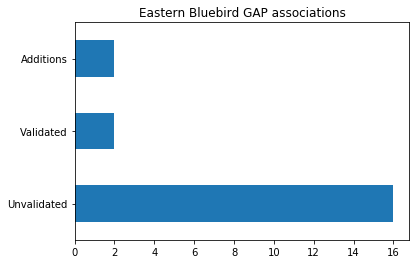

In [11]:
# Report and plot results for proportion of GAP systems validated ------------------------------
eval_df = pd.DataFrame(index=["Unvalidated", "Validated", "Additions"], columns=["GAP_types"])
eval_df.loc['Unvalidated', "GAP_types"] = len(gap_types) - len(df_valid)
eval_df.loc['Validated', "GAP_types"] = len(df_valid)
eval_df.loc['Additions', "GAP_types"] = len(df_add)
eval_df = eval_df.fillna(0)
print(eval_df)
plt2 = eval_df.plot(y='GAP_types', kind='barh', legend=False, title = species + " GAP associations")